In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(256, 256)


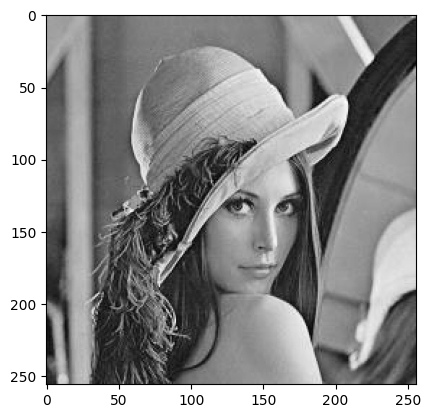

In [42]:
img = cv2.imread('../images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

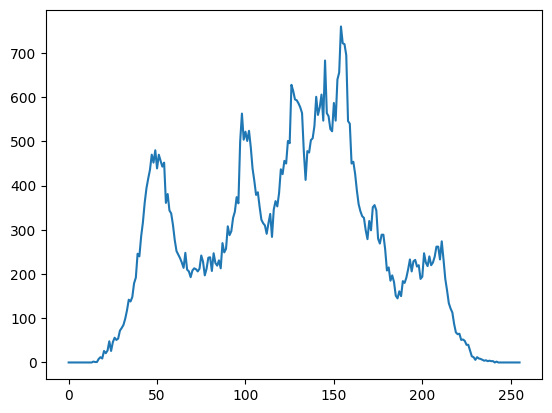

In [43]:
hist = cv2.calcHist([gImg], [0], None, [256], [0, 255])
plt.plot(hist)

(256, 256)


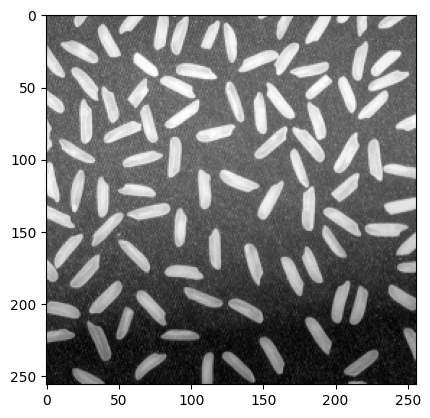

In [44]:
img = cv2.imread('../images/rice.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

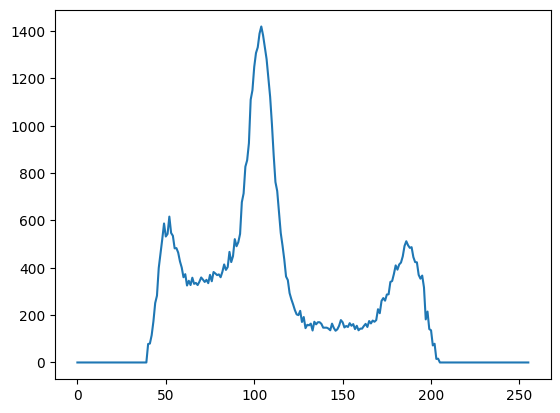

In [45]:
hist = cv2.calcHist([gImg], [0], None, [256], [0, 255])
plt.plot(hist)

In [46]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]))

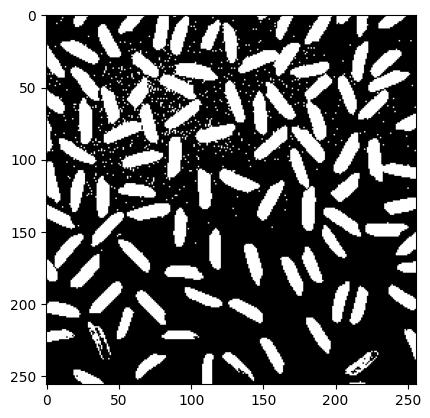

In [47]:
T = 120
for h in range(gImg.shape[0]):
    for w in range(gImg.shape[1]):
        if(gImg[h][w] > T):
            gBin[h][w] = 255
        else:
            gBin[h][w] = 0

plt.imshow(gBin, cmap='gray')

(360, 360)


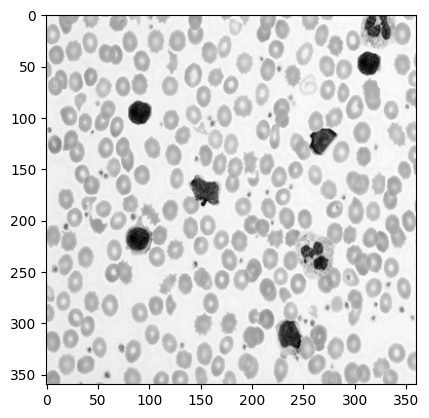

In [48]:
img = cv2.imread('../images/cell.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

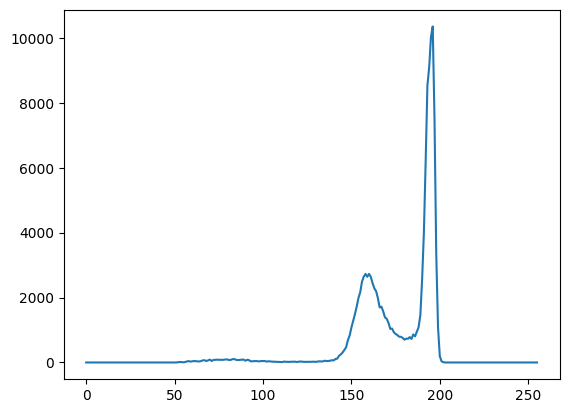

In [49]:
hist = cv2.calcHist([gImg], [0], None, [256], [0, 255])
plt.plot(hist)

In [50]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]))

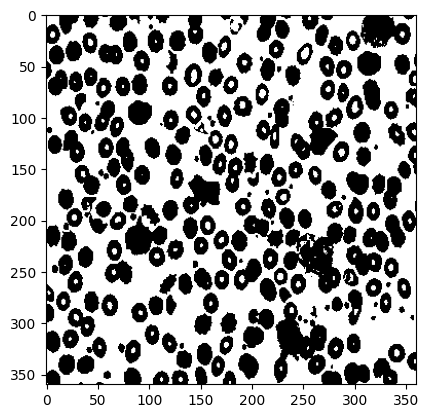

In [51]:
T = 175
for h in range(gImg.shape[0]):
    for w in range(gImg.shape[1]):
        if(gImg[h][w] > T):
            gBin[h][w] = 255
        else:
            gBin[h][w] = 0

plt.imshow(gBin, cmap='gray')

(360, 360)


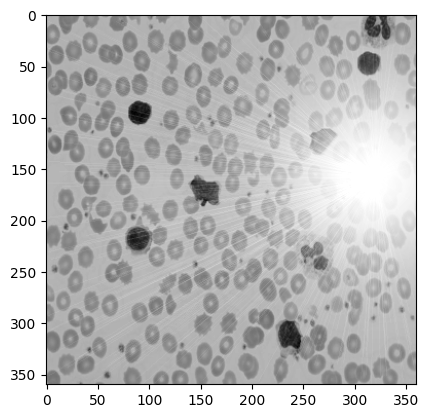

In [52]:
img = cv2.imread('../images/cell-bright.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

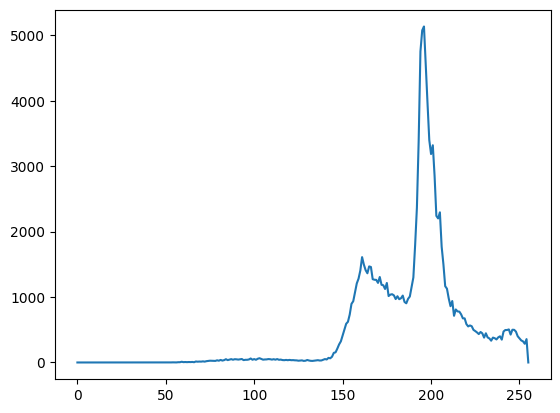

In [53]:
hist = cv2.calcHist([gImg], [0], None, [256], [0, 255])
plt.plot(hist)

In [54]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]))

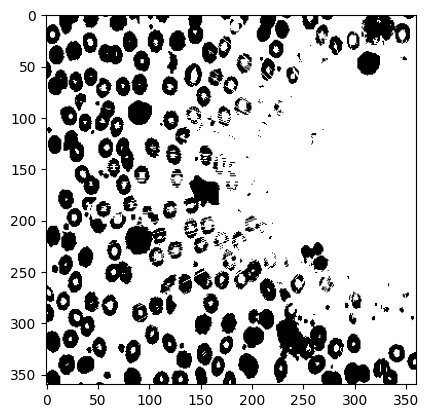

In [55]:
T = 175
for h in range(gImg.shape[0]):
    for w in range(gImg.shape[1]):
        if(gImg[h][w] > T):
            gBin[h][w] = 255
        else:
            gBin[h][w] = 0

plt.imshow(gBin, cmap='gray')

(256, 256)


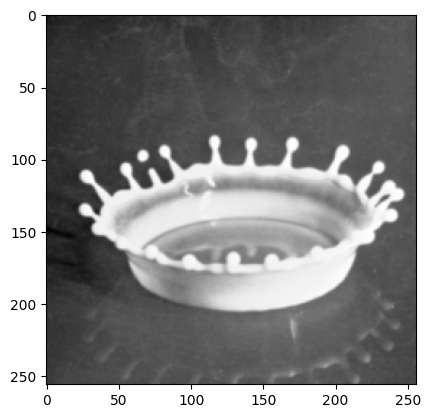

In [56]:
img = cv2.imread('../images/milkdrop.bmp')
# RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

In [57]:
T1 = 50
T2 = 0
T0 = 1
outImg = np.zeros((gImg.shape[0], gImg.shape[1]))

In [58]:
def threshold_update(img, output, T1):
    img = np.int32(img)
    sum1 = 0
    count1 = 1
    sum2 = 0
    count2 = 1
    for h in range(img.shape[0]):
        for w in range(img.shape[1]):
            if(output[h, w] == 255):
                sum1 = sum1 + img[h, w]
                count1 = count1 + 1
            else:
                sum2 = sum2 + img[h, w]
                count2 = count2 + 1

    # 그룹별 픽셀 평균 계산
    avg1 = sum1 / count1
    avg2 = sum2 / count2

    # 평균으로 새로운 임계값 계산
    T2 = np.int32(avg1 + avg2)/2
    return T2

In [59]:
#1) 영상 초기 임계값 적용하기
for h in range(gImg.shape[0]):
    for w in range(gImg.shape[1]):
        if(gImg[h, w] > T1):
            outImg[h, w] = 255
        else:
            outImg[h, w] = 0

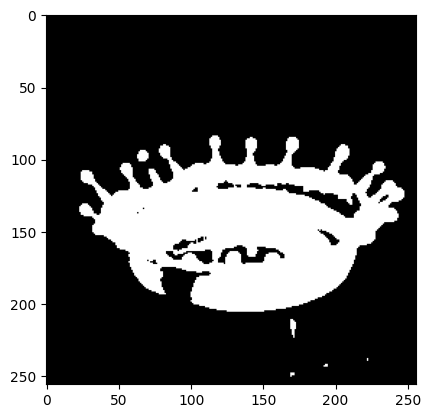

In [60]:
#2) 종료 조건을 만족할 때까지 계속 반복
while True:
    # 새로운 임계값 생성을 위한 함수 호출
    T2 = threshold_update(gImg, outImg, T1)
    # 새로운 임계값과 이전 임계값의 변화 측정
    if(np.abs(T1 - T2) < T0):
        # 종료 조건을 만족하면 새로운 임계값으로 영상 이진화 후 출력
        for h in range(gImg.shape[0]):
            for w in range(gImg.shape[1]):
                if(gImg[h, w] > T2):
                    outImg[h, w] = 255
                else:
                    outImg[h, w] = 0
        break
    # 종료 조건을 만족하지 않는다면
    else:
        # 새로운 임계값으로 다시 이진화 작업
        T1 = T2
        for h in range(gImg.shape[0]):
            for w in range(gImg.shape[1]):
                if(gImg[h, w] > T1):
                    outImg[h, w] = 255
                else:
                    outImg[h, w] = 0

# 그림을 화면에 출력
plt.imshow(outImg, cmap='gray')
